In [41]:
#IMPORT OF PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#MASH Exciton Data

#Create column names for df
column_names = ["Time"]
excitation_data_path = "Data/mash_exc300K.dat"
for i in range(1,8):
    column_names.append(str(i))

#Import MASH Exciton Data as df, and skip every 50 to align dataset with least squares data set
df = pd.read_csv(excitation_data_path, delimiter=" ", names=column_names)
#df = df[df["Time"]<=4000]
#df = df[df["Time"]>500]
df = df[(df.index % 50 == 0) | (df.index == len(df) - 1)]

In [43]:
#Import MASH exciton least squares optimized data
excitation_data_ls_path = "exc_ls.dat"
column_name_ls = ["1_ls","2_ls","3_ls","4_ls","5_ls","6_ls","7_ls"]
df1 = pd.read_csv(excitation_data_ls_path,delimiter="\t", names = column_name_ls)

<function matplotlib.pyplot.show(close=None, block=None)>

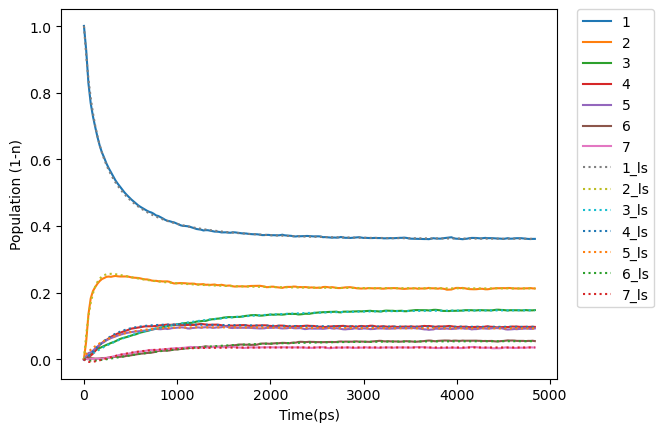

In [44]:

for column_name in column_names[1:]:
    plt.plot(df["Time"], df[column_name],"-", label=column_name)
for column_name in column_name_ls:
    plt.plot(df["Time"],df1[column_name], ":", label=column_name)

plt.xlabel("Time(ps)")
plt.ylabel("Population (1-n)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.show


In [62]:
#Import Site Data
site_data_path = "Data/mash_site300K.dat"
column_names = ["Time","1","2","3","4","5","6","7"] #Over Time in ps
df2 = pd.read_csv(site_data_path,delimiter=" ",names=column_names)
df2 = df2[(df2.index % 50 == 0) | (df2.index == len(df2) - 1)]
time_t = df2["Time"].values
delta_t = time_t[1]-time_t[0]

In [64]:
df = df2[df2["Time"]>=10e+02]
df = df[(df.index % 30 == 0) | (df.index == len(df) - 1)]
time_t = df["Time"].values

In [65]:
residuals_site_data_path = "Site_data/residual_data_98.dat"
column_name_ls = ["Start Time", "Residual"]
residual_df = pd.read_csv(residuals_site_data_path,delimiter="\t", names = column_name_ls)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


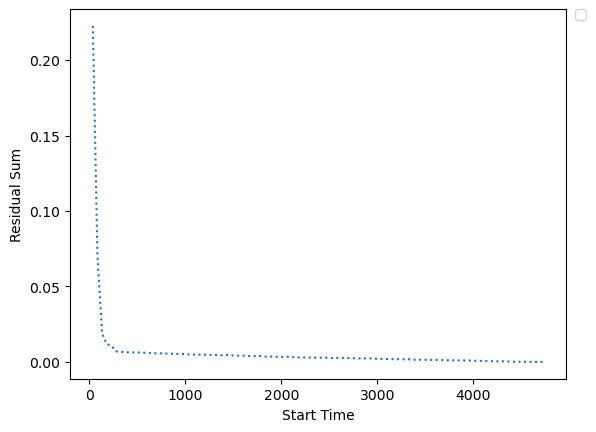

In [67]:
#Plotting site data 
plt.plot(residual_df["Start Time"],residual_df["Residual"],":")

plt.xlabel("Start Time")
plt.ylabel("Residual Sum")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

In [68]:
#Import least squares optimized site data
site_data_ls_path = "site_ls.dat"
column_name_ls = ["1","2","3","4","5","6","7"] #Over Time in ps
df4 = pd.read_csv(site_data_path,delimiter="\t",names=column_names)

In [69]:
from leastsquares_site300K_all_states import new_matkappa_to_matr,p_model
from scipy.linalg import expm
kappas = np.loadtxt("site_ls_kappas.dat")
print(kappas)
r_of_t_ls = new_matkappa_to_matr(kappas)
exp_ls_del_t = expm(r_of_t_ls*delta_t)
p_model_least_squares = np.array(p_model(exp_ls_del_t,time_t.size))

df = pd.DataFrame(p_model_least_squares, columns=column_name_ls)
df.tail()

[ 0.03371121  0.01147    -0.02778018  0.00625624 -0.01191181  0.02946798
 -0.0120115   0.04238494 -0.00453027  0.01223639 -0.04075784  0.01771261
 -0.00776751  0.03708105 -0.00794266  0.00596709 -0.03333643  0.02041242
  0.00712163  0.02358211  0.0192635 ]


,1,2,3,4,5,6,7
48,0.287747,0.092479,0.214115,0.077361,0.135657,0.041028,0.151614
49,0.286832,0.089229,0.213833,0.076070,0.138161,0.041531,0.154344
50,0.286047,0.085989,0.213448,0.074670,0.140704,0.042029,0.157113
51,0.285391,0.082758,0.212960,0.073160,0.143289,0.042520,0.159922
52,0.284864,0.079531,0.212368,0.071539,0.145918,0.043006,0.162775


KeyError: 'Time'

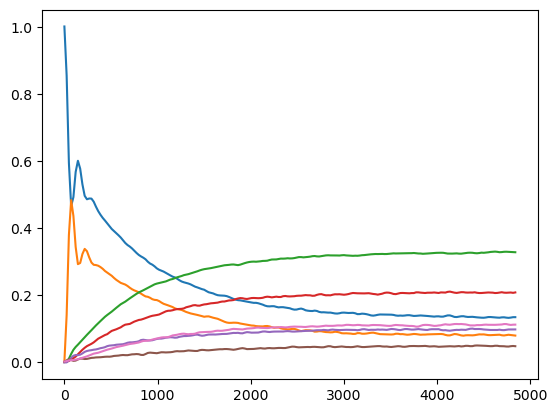

In [71]:
for column_name in column_names[1:]:
    plt.plot(df2["Time"], df2[column_name],"-", label=column_name)
for column_name in column_name_ls:
    plt.plot(df["Time"],df[column_name], ":", label=column_name)

plt.xlabel("Time(ps)")
plt.ylabel("Population (1-n)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.show